In [11]:
from tile_classifier import TileClassifier
from letter_classifier import LetterClassifier
from image_processing import *
from skimage.transform import resize

In [3]:
if __name__ == '__main__':

    tile_model_path ='models/tile_classifier.h5'
    tiles_data_path = './data/data_set_tile'
    tileClassifier = TileClassifier(tiles_data_path,tile_model_path)
    tileClassifier.train_evaluate(5)

    letter_model_path = 'models/letter_classifier.h5'
    letters_data_path = './data/data_set_letter'
    letterClassifier = LetterClassifier(letters_data_path,letter_model_path)
    letterClassifier.train_evaluate(25)

Found 1868 images belonging to 2 classes.
Epoch 1/5
1494/1494 [==============================] - 25s 16ms/step - loss: 0.4639 - acc: 0.7617
Epoch 2/5
1494/1494 [==============================] - 23s 15ms/step - loss: 0.1737 - acc: 0.9398
Epoch 3/5
1494/1494 [==============================] - 26s 17ms/step - loss: 0.2068 - acc: 0.9411
Epoch 4/5
1494/1494 [==============================] - 26s 18ms/step - loss: 0.0198 - acc: 0.9973
Epoch 5/5
374/374 [==============================] - 2s 6ms/step
[0.011560170539906298, 0.99732620193359045]
Found 812 images belonging to 33 classes.
Epoch 1/25
649/649 [==============================] - 10s 15ms/step - loss: 3.3934 - acc: 0.0632
Epoch 2/25
649/649 [==============================] - 9s 14ms/step - loss: 3.3132 - acc: 0.0909
Epoch 3/25
649/649 [==============================] - 12s 18ms/step - loss: 3.2934 - acc: 0.1048
Epoch 4/25
649/649 [==============================] - 11s 18ms/step - loss: 3.2849 - acc: 0.0770
Epoch 5/25
649/649 [========

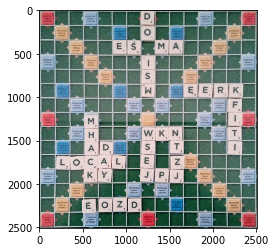

[[-1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 15 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  5 11 -1 13  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 30 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 11 -1 -1 27  5 17  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 16 -1]
 [-1 -1 -1 30 -1 -1 -1 -1 -1 -1 -1 -1 -1  9 -1]
 [-1 -1 -1 12 -1 -1 -1 13 11 14 -1 -1 -1 22 -1]
 [-1 -1 -1  1 15 -1 -1  5 -1 22 -1 -1 -1  9 -1]
 [-1  9 15  5  1 12 -1  5 -1 23 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 22 -1 -1 10 16 10 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  5 15 32 15 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
{'1blank': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'w': 21, 'y': 22, 'z': 23, 'ó': 24, 'ą': 25, 'ć': 26, 'ę': 27, 'ł': 28, 'ń': 29, 'ś': 30, 'ź':

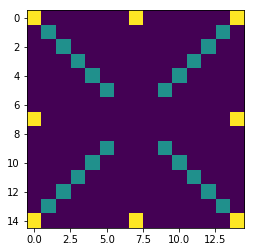

In [13]:
    slices = get_slices(image_path='./data/testy/000.jpg')
    
    predictions = list()
    for slice_ in slices:
        scaled_img = resize(slice_, (64, 64, 3), mode='reflect')
        img = np.expand_dims(scaled_img, axis=0)
        tile_prediction = tileClassifier.predict(img)
        class_prediction = np.argmax(tile_prediction.flatten()) - 1
        if (class_prediction == 0):
            letter_prediction = letterClassifier.predict(img)
            class_prediction = np.argmax(letter_prediction)
        predictions.append(class_prediction)

    predictions_board = np.array(predictions).reshape(15, 15)
    print(predictions_board)

    mapping = letterClassifier.get_class_indices()
    print(mapping)
    mapping.update({'_': -1,
                    'x': 0})
    inverse_mapping = {v: k[:1] for k, v in mapping.items()}
    mapped_board = np.vectorize(inverse_mapping.get)(predictions_board)
    print(mapped_board)

    points_dictionary = {
        'a': 1, 'ą': 5, 'b': 3, 'c': 2, 'ć': 6,
        'd': 2, 'e': 1, 'ę': 5, 'f': 5, 'g': 3,
        'h': 3, 'i': 1, 'j': 2, 'k': 2, 'l': 2,
        'ł': 3, 'm': 2, 'n': 1, 'ń': 7, 'o': 1,
        'ó': 5, 'p': 2, 'r': 1, 's': 1, 'ś': 5,
        't': 2, 'u': 3, 'w': 1, 'y': 2, 'z': 1,
        'ż': 5, 'ź': 9, 'x': 0, '_': 0
    }

    board_size = 15

    words = list()
    current_word = list()
    for i in range(board_size):
        for j in range(board_size):
            val = predictions_board[i,j]
            if val > -1:
                points = inverse_mapping[val]
                current_word.append((i,j,points))
            else:
                current_word_len = len(current_word)
                if(current_word_len > 1):
                    words.append(current_word)
                    current_word = list()
                elif(current_word_len == 1):
                    current_word = list()

    for j in range(board_size):
        for i in range(board_size):
            val = predictions_board[i,j]
            if val > -1:
                points = inverse_mapping[val]
                current_word.append((i,j,points))
            else:
                current_word_len = len(current_word)
                if(current_word_len > 1):
                    words.append(current_word)
                    current_word = list()
                elif(current_word_len == 1):
                    current_word = list()
    print(words)

    premium_letters_board = np.ones((15,15))
    doubles = [(3,0),(11,0),(6,2),(8,2),(0,3),(7,3),(14,3),
               (2,6),(6,6),(8,6),(12,6),(3,7),(11,7),(2,8),
               (6,8),(8,8),(12,8),(0,11),(7,11),(14,11),(6,12),
               (8,12),(3,14),(11,14)]

    triples = [(5,1),(9,1),(1,5),(5,5),(9,5),(13,5),
               (1,9),(5,9),(9,9),(13,9),(5,13),(9,13)]
    for point in doubles:
        premium_letters_board[point[0],point[1]] = 2
    for point in triples:
        premium_letters_board[point[0],point[1]] = 3

    premium_word_board = np.ones((15,15))

    for i in range(board_size):
        premium_word_board[i][i] = 2
        premium_word_board[i][board_size - 1 - i] = 2

    for x in 0, (board_size - 1) // 2, board_size - 1:
        for y in 0, (board_size - 1) // 2, board_size - 1:
            premium_word_board[x][y] = 3

    for i in [board_size // 2 - 1, board_size // 2, board_size // 2 + 1]:
        premium_word_board[i][i] = 1
        premium_word_board[i][board_size - 1 - i] = 1

        
    plt.imshow(premium_word_board)
    plt.show()

    points_dictionary = {
        'a': 1, 'ą': 5, 'b': 3, 'c': 2, 'ć': 6,
        'd': 2, 'e': 1, 'ę': 5, 'f': 5, 'g': 3,
        'h': 3, 'i': 1, 'j': 2, 'k': 2, 'l': 2,
        'ł': 3, 'm': 2, 'n': 1, 'ń': 7, 'o': 1,
        'ó': 5, 'p': 2, 'r': 1, 's': 1, 'ś': 5,
        't': 2, 'u': 3, 'w': 1, 'y': 2, 'z': 1,
        'ż': 5, 'ź': 9, 'x': 0, '_': 0
    }

In [10]:
    def count_points(word):
        sum = 0
        word_mul = 1
        for letter in word:
            x = letter[0]
            y = letter[1]
            val = points_dictionary[letter[2]]
            letter_mul = premium_letters_board[x,y]
            word_mul *= premium_word_board[x,y]
            sum += val*letter_mul
        return sum

    scores = [count_points(word) for word in words]


    print(scores)

[5.0, 5.0, 10.0, 7.0, 2.0, 6.0, 3.0, 8.0, 18.0, 15.0, 4.0, 3.0, 9.0, 8.0, 10.0, 11.0]
